# IST 718: Big Data Analytics

- Professor: Daniel Acuna <deacuna@syr.edu>

## General instructions:

- You are welcome to discuss the problems with your classmates but __you are not allowed to copy any part of your answers either from your classmates or from the internet__
- You can put the homework files anywhere you want in your https://jupyterhub.ischool.syr.edu/ workspace but _do not change_ the file names. The TAs and the professor use these names to grade your homework.
- Remove or comment out code that contains `raise NotImplementedError`. This is mainly to make the `assert` statement fail if nothing is submitted.
- The tests shown in some cells (i.e., `assert` and `np.testing.` statements) are used to grade your answers. **However, the professor and TAs will use __additional__ test for your answer. Think about cases where your code should run even if it passess all the tests you see.**
- Before downloading and submitting your work through Blackboard, remember to save and press `Validate` (or go to 
`Kernel`$\rightarrow$`Restart and Run All`). 
- Good luck!

In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# Part 3: Optimization

The golden ratio is a beautiful number that appears all over nature and mathematics (see more https://en.wikipedia.org/wiki/Golden_ratio).

It is defined as the solution of the following interesting relationship between the sum of two lengths $a$ and $b$ and their ratio $\frac{a}{b}$:

$$\frac{a + b}{a}=\frac{a}{b}\equiv g$$

which we can express as the solution of an equation after moving factors around


$$\frac{a}{a} + \frac{b}{a}=\frac{a}{b}\equiv g$$

and replacing gives the equation we must solve:

$$1 + \frac{1}{g}=g \tag{1}$$

We will further define the left hand side of (1) as 
$$\text{lhs}(g)=1 + \frac{1}{g}$$

and the right-hand side as
$$\text{rhs}(g)=g$$

In this section, we are going to compute the golder ratio using gradient descent.

**Question 3.1 (5 pts)** Simultaneously plot the right-hand side function and left-hand side function over the range of g in 0.5 and 2.5. Add the proper axis labels and legends to the plot. You can use the function `np.linspace` to generate a vector of numbers between 0.5 and 2.5. Try to intuitively think at which point both functions intersect.

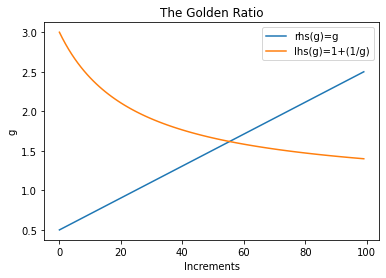

In [2]:
rhs = np.linspace(0.5, 2.5, 100) # generated vector of 100 numbers from 0.5 to 2.5, assigned to rhs
lhs = (1 + 1/rhs) # (1 + 1 / rhs), assigned to lhs
plt.plot(rhs) # plotted rhs
plt.plot(lhs) # plotted lhs
plt.xlabel("Increments") # create xlabel ("Increments")
plt.ylabel("g") # create ylabel ("g")
plt.title("The Golden Ratio") # create title
plt.legend(("rhs(g)=g", "lhs(g)=1+(1/g)"), frameon=True) # create legend
plt.show() # show plot

**Question 3.2 (10 pts)** Define a quadratic loss function `L` that penalizes the error (e.g., the difference) between the lhs and rhs for a given value of $g$.

In [3]:
def L(g): # defined L() loss function
    loss = (g-(1+(1/g)))**2 # compute loss
    return loss # return loss

You can try your function below. We know that the golden ratio is closer to 1.5 than 1.0, therefore, your loss function should be bigger at `g=1.0` than `g=1.5`

In [4]:
print(f"L(1.0)={L(1.0):.2f}")
print(f"L(1.5)={L(1.5):.2f}")

L(1.0)=1.00
L(1.5)=0.03


In [5]:
# 10 pts
np.testing.assert_equal(L(1.0), 1.)
assert L(1.0) > L(1.5)
np.testing.assert_almost_equal(L(1.618033988749895), 0.)

**Question 3.3 (10 pts)** Define a function `dL` that is the derivative of the loss function with respect to g

In [6]:
def dL(g): # define dL() derivative of loss function
    d_loss = 2*((1/g**2)+1)*(g-(1/g)-1) # compute derivative of loss
    return d_loss # return derivative of loss

You can try your function below. We know that from 1 you are getting closer to the golden ratio and after 2 your are getting away from it. Therefore, the derivative at 1 should be negative and 2 should be positive.

In [7]:
print(f"dL(1.0)={dL(1.0):.2f}")
print(f"dL(2.0)={dL(2.0):.2f}")

dL(1.0)=-4.00
dL(2.0)=1.25


In [8]:
# 10 points
np.testing.assert_equal(dL(1.0), -4)
np.testing.assert_equal(dL(2.0), 1.25)
np.testing.assert_almost_equal(dL(1.618033988749895), 0.)

**Question 3.4 (5 pts)** The gradient descent code below is missing some pieces. Fix it so that the final value of g is close to the golden ratio (approximately 1.61)

In [9]:
# initial guess for g
g = 0.1 # initial guess
learning_rate = 0.01 # learning rate (delta)
for i in range(2000): # iterate 2000 times
    if i % 100 == 0: # for every 100 iterations
        print(f"iteration {i}\t\tg: {g:3f}\t\tL:{L(g):3f}\t\tg:{dL(g):3f}") # print statement
    g = g - (learning_rate * dL(g)) # adjust g
print(f"\nFinal guess for the golden ratio: {g:5f}") # print final guess for the golden ratio

iteration 0		g: 0.100000		L:118.810000		g:-2201.800000
iteration 100		g: 3.887942		L:6.920773		g:5.609543
iteration 200		g: 1.716894		L:0.018076		g:0.360115
iteration 300		g: 1.620150		L:0.000009		g:0.008074
iteration 400		g: 1.618077		L:0.000000		g:0.000165
iteration 500		g: 1.618035		L:0.000000		g:0.000003
iteration 600		g: 1.618034		L:0.000000		g:0.000000
iteration 700		g: 1.618034		L:0.000000		g:0.000000
iteration 800		g: 1.618034		L:0.000000		g:0.000000
iteration 900		g: 1.618034		L:0.000000		g:0.000000
iteration 1000		g: 1.618034		L:0.000000		g:0.000000
iteration 1100		g: 1.618034		L:0.000000		g:0.000000
iteration 1200		g: 1.618034		L:0.000000		g:0.000000
iteration 1300		g: 1.618034		L:0.000000		g:0.000000
iteration 1400		g: 1.618034		L:0.000000		g:0.000000
iteration 1500		g: 1.618034		L:0.000000		g:0.000000
iteration 1600		g: 1.618034		L:0.000000		g:0.000000
iteration 1700		g: 1.618034		L:0.000000		g:0.000000
iteration 1800		g: 1.618034		L:0.000000		g:0.000000
iteration 1900		g:

In [10]:
# 5 pts
np.testing.assert_approx_equal(g, 1.61, significant=3)